<a href="https://colab.research.google.com/github/Madiha64/Madiha-CV-cat-dog-cnn/blob/main/Transfer_Learning_with_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [2]:
# 1st step: Load and preprocess the data
IMG_SIZE = 160  # MobileNetV2 expects 160x160

def format_img(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

train_ds = train_ds.map(format_img).batch(32).prefetch(1)
val_ds = val_ds.map(format_img).batch(32).prefetch(1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.XNBMZ8_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:

class_names = ds_info.features["label"].names
print(class_names)

['cat', 'dog']


In [4]:
# Step 2: Load Pretrained MobileNetV2 Base
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 425s 720ms/step - accuracy: 0.9426 - loss: 0.1485 - val_accuracy: 0.9791 - val_loss: 0.0612
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 470s 808ms/step - accuracy: 0.9790 - loss: 0.0578 - val_accuracy: 0.9819 - val_loss: 0.0570
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 475s 816ms/step - accuracy: 0.9823 - loss: 0.0510 - val_accuracy: 0.9807 - val_loss: 0.0573
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 474s 815ms/step - accuracy: 0.9840 - loss: 0.0469 - val_accuracy: 0.9811 - val_loss: 0.0576
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 470s 807ms/step - accuracy: 0.9860 - loss: 0.0437 - val_accuracy: 0.9817 - val_loss: 0.0578


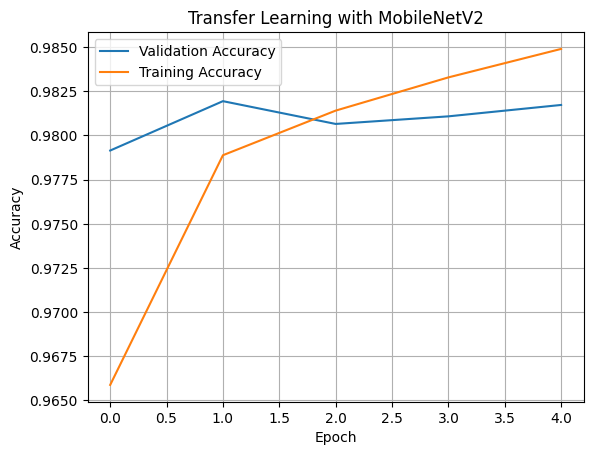

In [5]:
# Step 3: Add Custom Classification Head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Step 4: Compile and Train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=5)

# Step 5: Plot Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Transfer Learning with MobileNetV2')
plt.grid(True)
plt.show()